# Comparison of spectrum between eNATL60 outputs and Alitka Satellite 

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 - git clone https://github.com/brodeau/climporn
 
Assumes that time is encoded in datetime64 format in both datasets.

Looks for model months in the longest year of Altika serie

In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_DIR = '/home/jovyan/gonzag_cloud/gonzag' ; # get it there: https://github.com/brodeau/climporn
sys.path.append(GONZAG_DIR)
import gonzag as gz


## Params

For the model

In [3]:
model = 'GIGATL'
region = '1'
season = 'fma'
name_mod = model+'-Region'+region+'-'+season
name_ssh_mod = 'zeta'
name_lsm_mod = 'salt' 
name_lat_mod = 'lat'
name_lon_mod = 'lon'
name_time_mod = 'ocean_time'
l_griddist = False
period_mod = ['2000-02-01','2000-04-30']

For altimetry data

In [4]:
name_sat= 'Altika'
tag_sat_catalog = 'al'
name_ssh_sat='sla_unfiltered'
name_time_sat='time'
period_sat = ['2014-02-01','2014-04-30'] #should cover the same period of a different year if needed

## Data

In [5]:
import xarray as xr
import intake
import gcsfs

gcs = gcsfs.GCSFileSystem(requester_pays=True)

cat = intake.open_catalog('../SWOT-AdAC/catalog.yaml')
dsmod = cat[model](region=region,depth='surf', season=season).to_dask()

In [6]:
dsmod

<xarray.Dataset>
Dimensions:     (eta_rho: 1489, eta_v: 1488, time: 2280, xi_rho: 1491, xi_u: 1490)
Dimensions without coordinates: eta_rho, eta_v, time, xi_rho, xi_u
Data variables: (12/13)
    angle       (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    f           (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    h           (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    lat         (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    lon         (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    ocean_time  (time) float32 dask.array<chunksize=(24,), meta=np.ndarray>
    ...          ...
    pn          (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    salt        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>
    temp        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>
    u           (time, eta_rho, xi_u) float32 dask.array<chunksize=(24, 1489, 1490), meta=np.ndarray>
    v           (time, eta_v, xi_rho) float32 dask.array<chunksize=(24, 1488, 1491), meta=np.ndarray>
    zeta        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>

In [7]:
from datetime import datetime as dtm
t=dsmod.ocean_time.values
date = dtm.utcfromtimestamp(t[0])
print(date)

2000-01-29 00:28:48


In [8]:
date = dtm.utcfromtimestamp(t[-1])
print(date)

2000-05-02 23:29:04


In [9]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat[tag_sat_catalog].to_dask()

In [10]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185 ... 2015...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    ...                        ...
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [11]:
dataset=dsmod
period=period_mod
varlon=name_lon_mod
varlat=name_lat_mod
vartime=name_time_mod
gridset=dsmod
varlsm=name_lsm_mod
distorded_grid=False

In [12]:
       from gonzag.io import GetTimeVector, GetModelCoor, GetModelLSM, Save2Dfield


In [13]:
rvt = GetTimeVector( dataset, name_time_mod, lquiet=True )

In [15]:
rvt

array(['2000-01-29T00:28:48.000000', '2000-01-29T01:29:36.000000',
       '2000-01-29T02:29:20.000000', ..., '2000-05-02T21:29:36.000000',
       '2000-05-02T22:29:20.000000', '2000-05-02T23:29:04.000000'],
      dtype='datetime64[us]')

In [15]:
import numpy as nmp
(rtu1,rtu2)=nmp.array(period, dtype='datetime64')


In [16]:
rtu1

numpy.datetime64('2000-02-01')

In [17]:
rtu2

numpy.datetime64('2000-04-30')

In [18]:
from datetime import datetime as dtm
if type(rvt.values[0]) == nmp.float32:
    rvtdt=[]
    for k in nmp.arange(len(rvt)):
        rvtdt.append(nmp.array(dtm.utcfromtimestamp(rvt[k]), dtype='datetime64')) 

In [19]:
dtm.utcfromtimestamp(rvt[0])

datetime.datetime(2000, 1, 29, 0, 28, 48)

In [20]:
rvtdt[0]

array('2000-01-29T00:28:48.000000', dtype='datetime64[us]')

In [21]:
    idx1=nmp.where(rvtdt>rtu1)
    idx2=nmp.where(rvtdt<rtu2)


In [22]:
idx1

(array([  72,   73,   74, ..., 2277, 2278, 2279]),)

In [23]:
    kt1=idx1[0].min()
    kt2=idx2[0].max()


In [24]:
print(kt1,kt2)

72 2207


In [25]:
    isubsamp=1
    clndr = dataset[vartime]
    if kt1>0 and kt2>0:
        if kt1>=kt2: MsgExit('mind the indices when calling GetTimeVector()')
        vdate = clndr[kt1:kt2+1:isubsamp]
        cc = 'read...'
    else:
        vdate = clndr[::isubsamp]
        cc = 'in TOTAL!'


In [26]:
vdate.values

array([9.4936493e+08, 9.4936858e+08, 9.4937216e+08, ..., 9.5704378e+08,
       9.5704736e+08, 9.5705094e+08], dtype=float32)

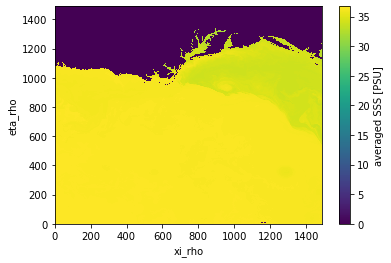

In [29]:
.plot()

In [30]:
xmsk = dsmod.salt[0] > 0

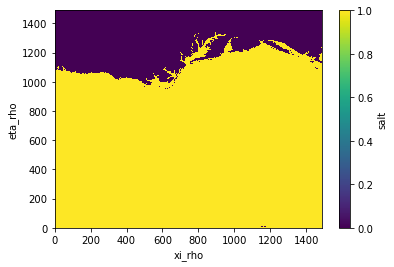

In [31]:
xmsk.plot()